<h1><center>Laboratorio 3: La desperación de Mr. Cheems 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/jesuvalenzuela/NanSquad)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar procesos más limpios en Feature Engineering.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
#!pip install --upgrade plotly
#import plotly.express as px
#import plotly.graph_objects as go

# Se usará matplotlib por preferencia personal
import matplotlib.pyplot as plt

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Feature engineering en datos de retail 🛍️

### 0. Cargar Dataset

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

Mr. Cheems, gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas. En una reunión, Mr Cheems le comenta que la calidad de sus datos no es muy buena, por lo que le solicita a usted que limpie su base de datos y cree nuevos atributos relevantes para el negocio.

Por ello, el área de ventas les entrega archivo llamado `online_retail_data.pickle` el cual usted decide cargar a continuación.

In [3]:
# Inserte su código aquí
df_retail = pd.read_pickle('online_retail_data.pickle')
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,ID489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,ID489434,79323P,PINK CHERRY LIGHTS,12.0,NaT,6.75,13085.0,United Kingdom
2,ID489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,ID489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,ID489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 1. Función para explorar características [0.5 puntos]

<p align="center">
  <img width=300 src="https://editor.analyticsvidhya.com/uploads/47389meme.png">
</p>




Tras inspeccionar brevemente los datos proporcionados, usted decide crear una función que realice lo siguiente:
- Plotee un histograma para las variables precios y cantidad. [0.3 puntos]
- Imprima un conteo de datos nulos por variable [0.2 puntos]

**Nota**: Para generar los gráficos no es obligatorio el uso de `plotly`, pero si es altamente recomendado. Pueden encontrar más información de esta librería en este [enlace](https://plotly.com/python/).

**Respuesta:**

In [4]:
# Se usará matplotlib por preferencia personal

def explore_data(dataframe_in, bins=30):
  """Grafica histogramas para las variables 'Price' y 'Quantity' de un DataFrame"""

  # Price
  plt.figure(figsize = (8,4))
  plt.hist(dataframe_in['Price'], bins=bins)
  plt.title('Histograma de Precio')
  plt.show()

  # Quantity
  plt.figure(figsize = (8,4))
  plt.hist(dataframe_in['Quantity'], bins=bins)
  plt.title('Histograma de Cantidad')
  plt.show()

  # Nulos
  print(f'conteo de nulos:\n{dataframe_in.isna().sum()}')

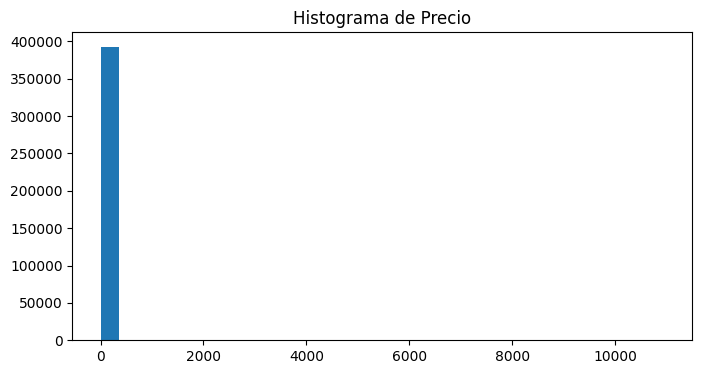

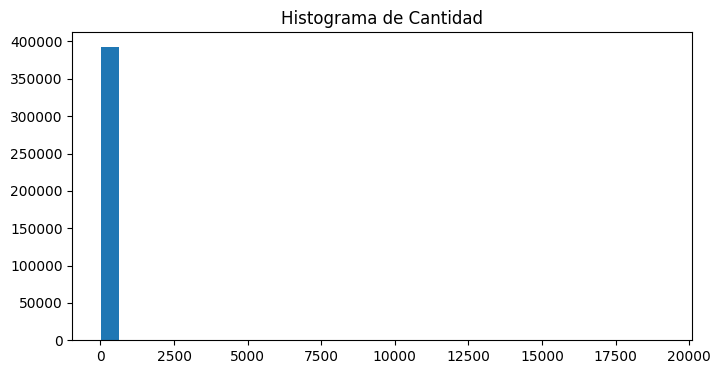

conteo de nulos:
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


In [5]:
explore_data(df_retail)

### 2. Eliminando outliers [1.0 puntos]

<p align="center">
  <img width=300 src="https://media.licdn.com/dms/image/C5612AQGdXKCka7HumA/article-cover_image-shrink_600_2000/0/1520056407281?e=2147483647&v=beta&t=VZcfjjzjK4LxXdZkSu1KisWC0Ry8bk4tPCn3R8aYdNM">
</p>




#### 2.1 Creando la clase IQR [0.5 puntos]

Entre las falencias de los datos, Mr. Cheems le comenta que a veces los operadores no ingresan el precio correcto de los productos. Mr. Cheems le comenta que se dio cuenta de este fenómeno porque hay productos con precios exagerádamente altos o bajos. Por lo cual usted decide eliminar outliers del dataframe a traves del rango intercuartil el cual cuenta con los siguientes pasos:

1. Calcular el primer cuartil $Q1$ y el tercer cuartil $Q3$. Hint: utilice el método `quantile()`

2. Calcular el rango intercuartil (RIC): $RIC = Q3 - Q1$

3. Calcular los límites para identificar outliers:
 - Límite inferior: $~~Q1 - \lambda \cdot RIC$
 - Límite superior: $~~Q3 + \lambda \cdot RIC$

4. Eliminar outliers: Los outliers son los datos que están por debajo del límite inferior o por encima del límite superior.


Para realizar dicha tarea, usted decide crear una clase llamada `IQR()` utilizando `BaseEstimator` y `TransformerMixin` para realizar una transformación de cada una de las columnas numéricas del DataFrame utilizando `ColumnTransformer()` más tarde. Considere que lambda debe ser $\lambda$ un parámetro a definir por el usuario.

**Hint:** tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer).

**Nota:** No modificar el método set_output de la clase IQR

**Respuesta:**

In [6]:
class IQR(BaseEstimator, TransformerMixin):

  def __init__(self, lambda_ = 1.5):
    # Inicializar
    self.lambda_ = lambda_

  def fit(self, X):
    # Si solo se entrega una columna:
    if isinstance(X, pd.Series):
      # Cálculo del rango intercuartil
      q1 = X.quantile(0.25)
      q3 = X.quantile(0.75)

      ric = q3 - q1

      # Cálculo de los límites
      self.limite_inferior = q1 - self.lambda_ * ric
      self.limite_superior = q3 + self.lambda_ * ric

      self.multicolumn = False
    
    # Para el caso donde X es un DataFrame
    elif isinstance(X, pd.DataFrame):
      # Calcular límites independientes para cada columna
      self.limites = {}
      
      for column in X.columns:
          q1 = X[column].quantile(0.25)
          q3 = X[column].quantile(0.75)
          ric = q3 - q1
          
          self.limites[column] = {
            'limite_inferior': q1 - self.lambda_ * ric,
            'limite_superior': q3 + self.lambda_ * ric
            }
      
      self.multicolumn = True
      self.column_names = X.columns.tolist()
    
    else:
      raise ValueError("X debe ser de tipo Series o DataFrame de pandas")

    return self

  def transform(self, X):
    # Corroborar que se ajustó el transformador
    if not hasattr(self, 'multicolumn'):
      raise ValueError("El transformador debe ser ajustado antes de usar transform()")

    if isinstance(X, pd.Series):
      # Filtrar outliers
      X_filtered = X.copy().clip(self.limite_inferior, self.limite_superior)
    
    elif isinstance(X, pd.DataFrame):
      # Filtrar outliers en todas las columnas
      X_filtered = X.copy()
      
      for column in X.columns:
          if column in self.limites:
              limite_inf = self.limites[column]['limite_inferior']
              limite_sup = self.limites[column]['limite_superior']
              X_filtered[column] = X_filtered[column].clip(limite_inf, limite_sup)

    return X_filtered

  def set_output(self, transform='default'):
    # No modificar esta función
    return self

#### 2.2 Creación del Pipeline [0.5 puntos]

Para comenzar introduciéndose en el uso de pipeline, usted decide definir un pipeline con el Transformer previamente definido. Además, usted decide visualizar cómo cambia la distribución de las variables Precio y Cantidad antes y despues de aplicar IQR. Para ello, usted aplica los siguientes pasos:

- Definir un pipeline llamado `numeric_transformations` para las variables precio y cantidad con la transformación IQR. [0.1 puntos]
- Defina un column transformer que aplique `numeric_transformations` para las variables numéricas y `passthrough` para las variables categóricas. Adicionalmente, fije el parámetro `verbose_feature_names_out` en `False`. Ver hint al final [0.1 puntos]
- Defina el dataframe `df_iqr` aplicado el column transformer a los datos proporcionados por Mr. Cheems considerando un valor de $\lambda$ que tenga un desempeño aceptable para ambas variables. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_iqr`.  [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables. ¿Qué sucede al aumentar el valor de lambda? [0.1 puntos]


**Hint:** El transformador `passthrough` está predefinido y es una opción que puedes usar para las columnas que no deseas transformar. Al especificar 'passthrough' para una parte de tu ColumnTransformer, las columnas correspondientes pasarán a través del ColumnTransformer sin ninguna modificación. El siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) le puede ser útil.

**Nota:** Mantenga el método set_output del column transformer con la transformación `pandas` para obtener un dataframe una vez aplicado el column transformer.

**Respuesta:**

Apóyese de la siguiente estructura para su respuesta:

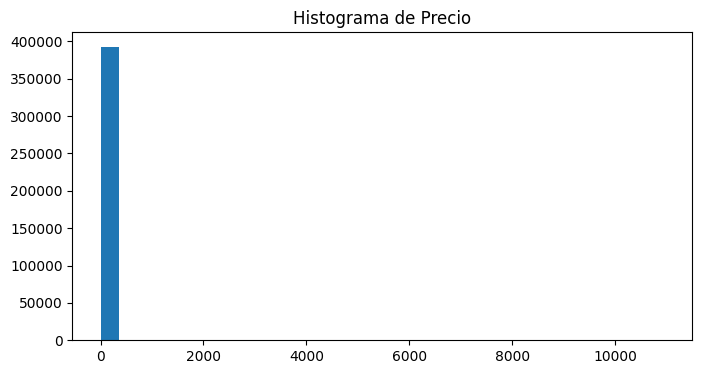

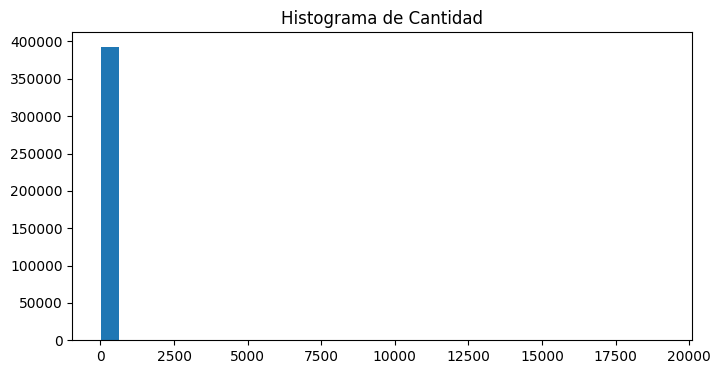

conteo de nulos:
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


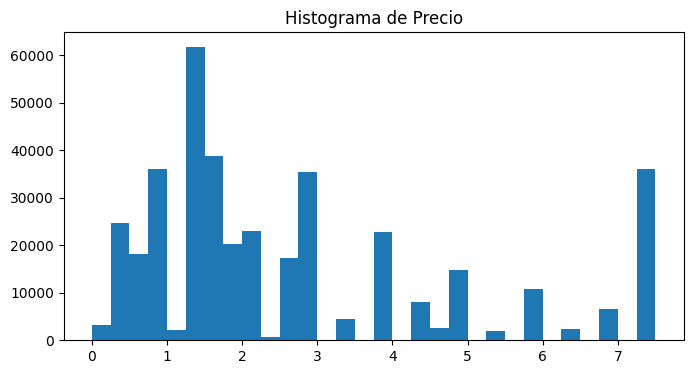

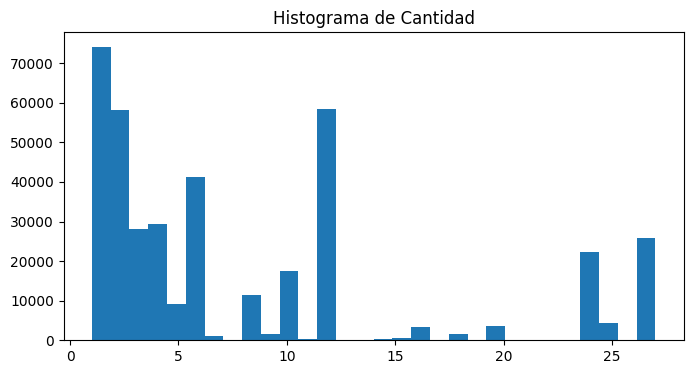

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64


In [7]:
# Definicion de las variables que pasarán por cada pipeline
numerical_columns = df_retail.select_dtypes(include='number').columns.values.tolist()
categorical_columns = df_retail.select_dtypes(exclude='number').columns.values.tolist()

# Definicion del pipeline
numeric_transformations = Pipeline([
    ('iqr', IQR(lambda_=1.5))
    ])

# ColumnTransformer
column_transformer = ColumnTransformer([
                    ('numerical',  numeric_transformations, numerical_columns),
                    ('categorical', 'passthrough', categorical_columns)
                    ],
                    verbose_feature_names_out=False)

column_transformer.set_output(transform='pandas')

# Aplicamos ColumnTransformer a los datos
df_iqr = column_transformer.fit_transform(df_retail)

# Gráficos
explore_data(df_retail)
explore_data(df_iqr)

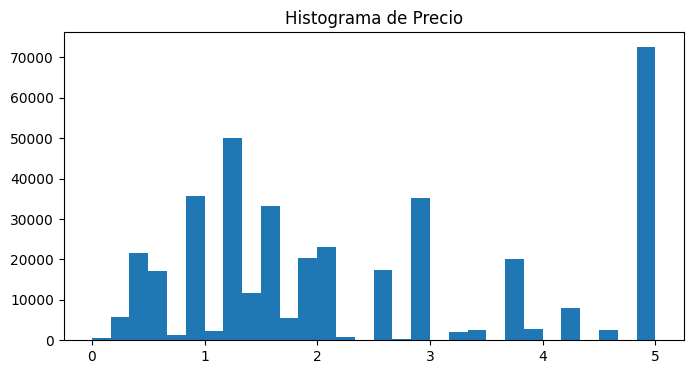

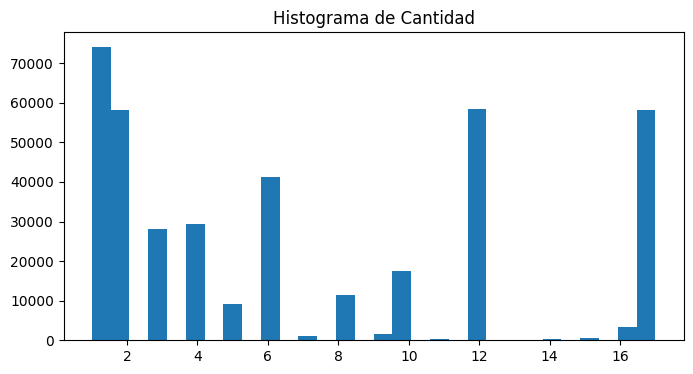

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64


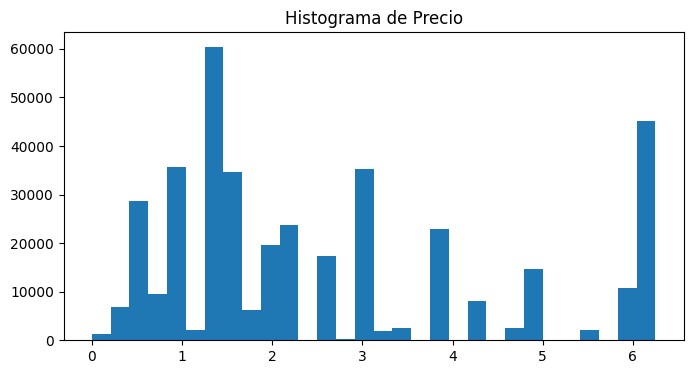

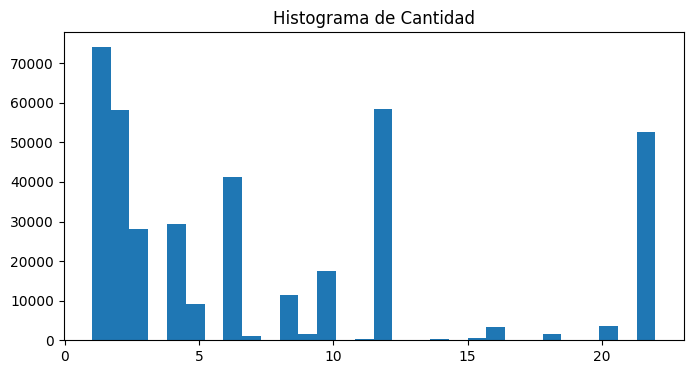

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64


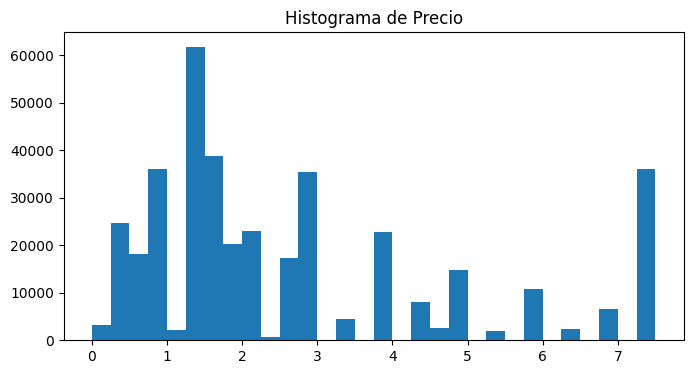

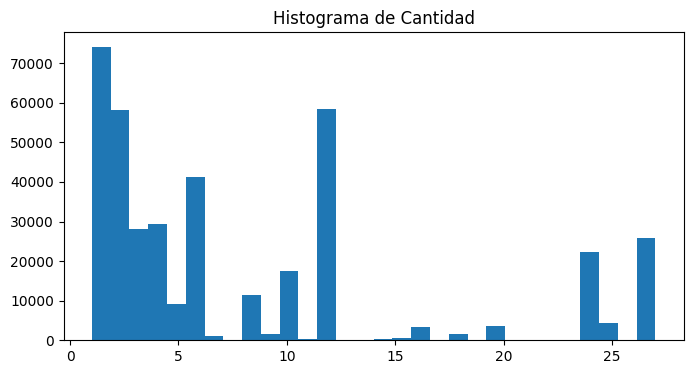

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64


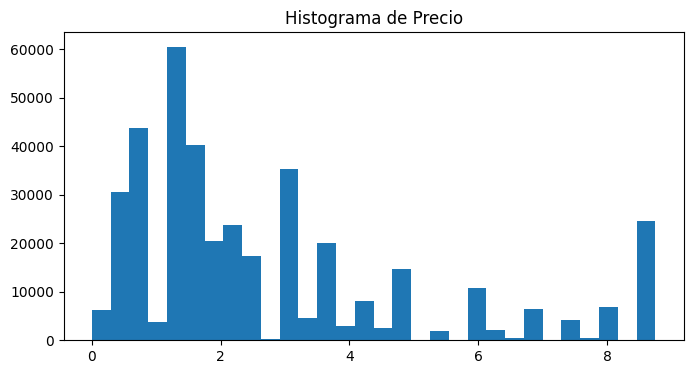

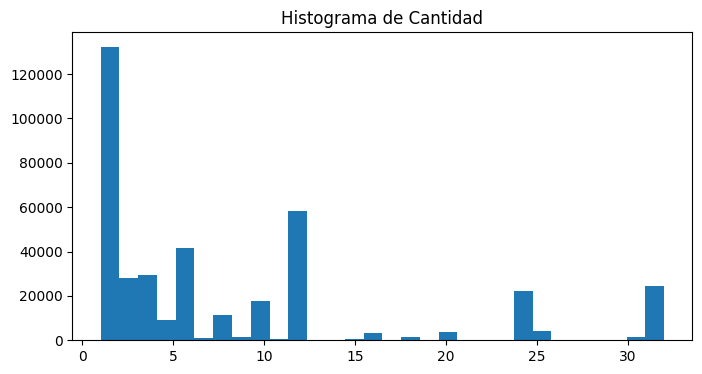

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64


In [8]:
# Probando distintos lambdas

lambdas = [0.5, 1, 1.5, 2]
for lamb in lambdas:
    # Definicion del pipeline
    numeric_transformations = Pipeline([
        ('iqr', IQR(lambda_=lamb))
        ])

    # ColumnTransformer
    column_transformer = ColumnTransformer([
                        ('numerical',  numeric_transformations, numerical_columns),
                        ('categorical', 'passthrough', categorical_columns)
                        ],
                        verbose_feature_names_out=False)

    column_transformer.set_output(transform='pandas')

    # Aplicamos ColumnTransformer a los datos
    df_iqr = column_transformer.fit_transform(df_retail)

    # Gráficos
    explore_data(df_iqr)

**Cambios observados:**

Dado que se filtraron los outliers, el ancho de los 'bins' del histograma disminuyó considerablemente. Como resultado, se puede vsualizar de mucho mejor forma la distribución de los valores, que antes quedaban agrupados en un mismo 'bin' debido a la presencia de outliers.

El valor de lambda afecta el punto de corte para el límite superior y límite inferior: Un lambda menor genera un rango más estrecho, con mínimo más alto y máximo más bajo, mientras que un lambda mayor genera el efecto opuesto, con un rango mas amplio.

### 3. Agregando un imputer al pipeline [1.0 puntos]



<p align="center">
  <img width=300 src="https://media.makeameme.org/created/hmm-there-is.jpg">
</p>

Para continuar con la limpieza del dataframe usted decide imputar los datos nulos de las variables numéricas, para lo cual decide realizar las siguientes tareas:

1. Crear un pipeline para variables categóricas llamado `categoric_transformations` con un paso llamado `mode_imputer`, en el cual se imputen los datos faltantes por la categoría más frecuente.
2. Agregar al pipeline `numeric_transformations` un paso llamado `mean_imputer`, en el cual se imputen los datos por la media usando [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) [0.1 puntos]
3. Crear y aplicar un `ColumnTransformer` actualizado con los pipelines `categoric_transformations` y `numeric_transformations` a `df_retail`, creando un dataframe llamado `df_mean_imputer`. [0.1 puntos]
4. Comparar los resultados de `explore_data` en `df_mean_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
5. Cambiar el imputer de `numeric_transformations` por [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) y definir un nuevo dataframe llamado `df_knn_imputer`, aplicando el nuevo ColumnTransformer a `df_retail`. En caso de los tiempos de ejecución sean altos puede probar a reducir el parámetro `n_neighbors`. [0.1 puntos]
6. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
7. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_mean_imputer`. ¿Cuál método de imputación es mejor? Deje el método escogido en el ColumnTransformer. [0.2 puntos]

**Nota: Fije el parámetro verbose_feature_names_out en `False` y utilice el método set_output con transformación `pandas` en cada ColumnTransformer para obtener como salida un dataframe.**

**Respuesta:**


[COMPARE] df_mean_imputer vs df_iqr


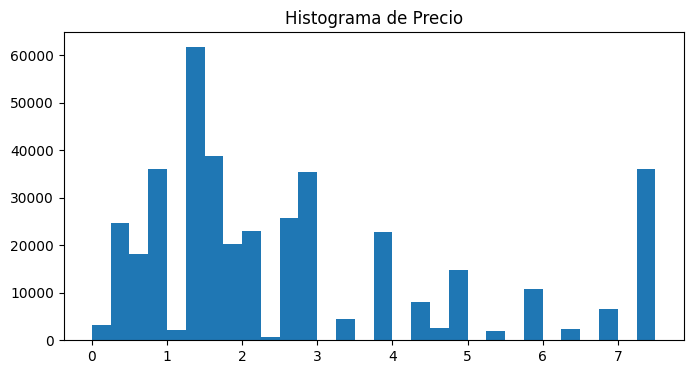

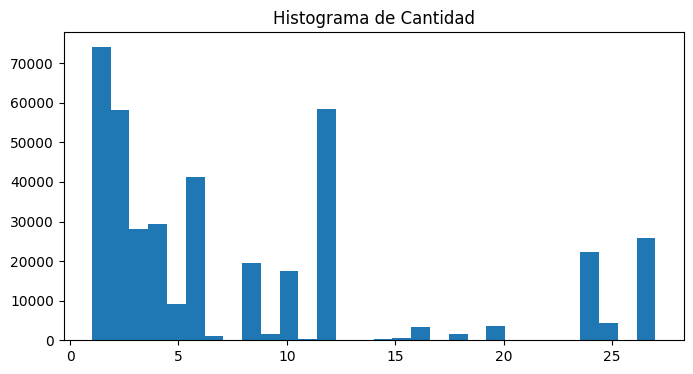

conteo de nulos:
Quantity       0
Price          0
Invoice        0
StockCode      0
Description    0
InvoiceDate    0
Customer ID    0
Country        0
dtype: int64


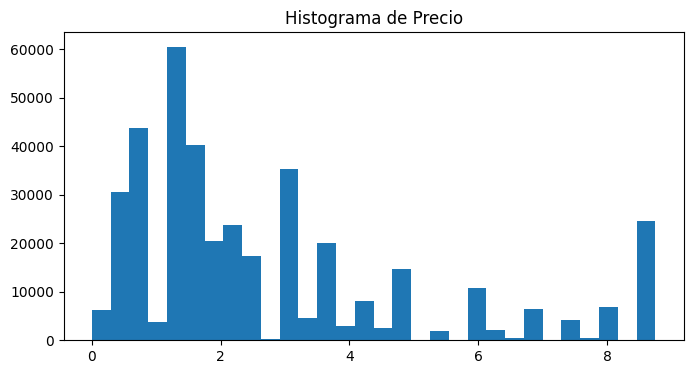

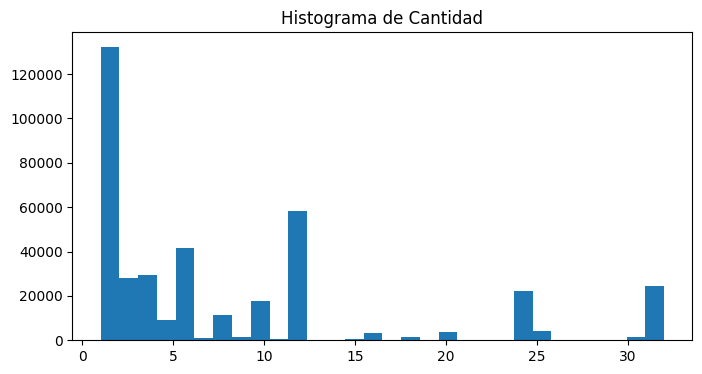

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64

[COMPARE] df_knn_imputer vs df_iqr


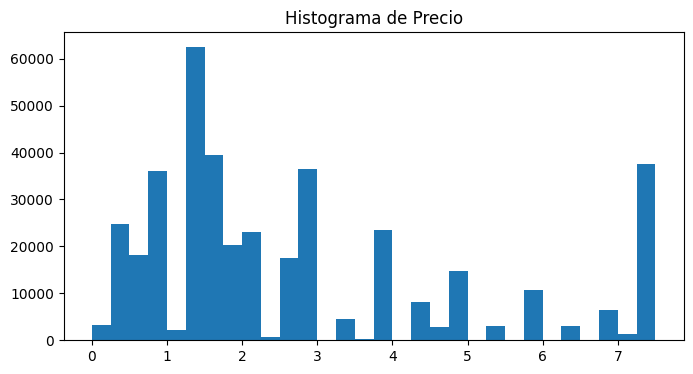

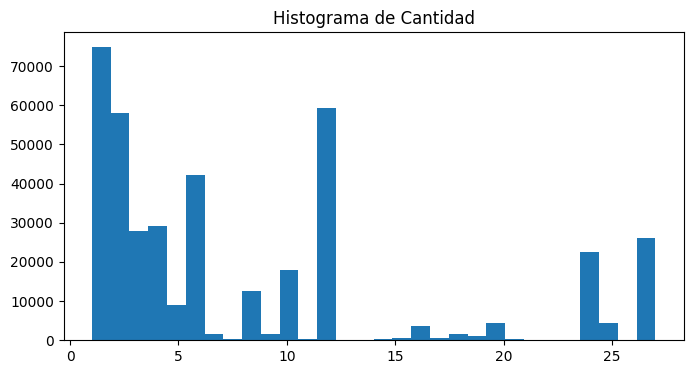

conteo de nulos:
Quantity       0
Price          0
Invoice        0
StockCode      0
Description    0
InvoiceDate    0
Customer ID    0
Country        0
dtype: int64


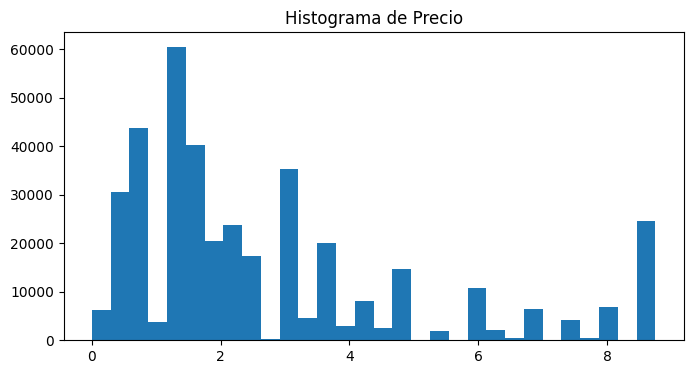

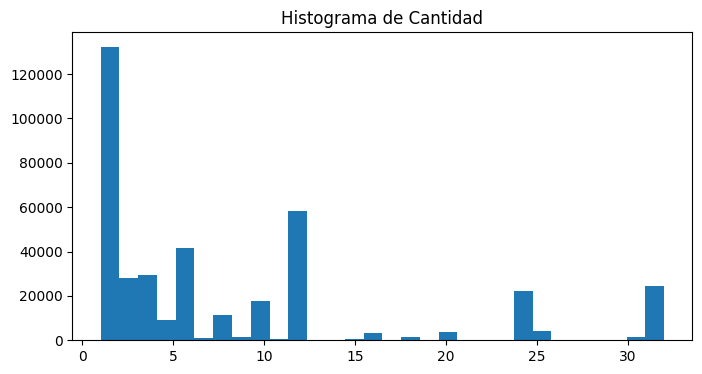

conteo de nulos:
Quantity       7915
Price          8356
Invoice           0
StockCode         0
Description       0
InvoiceDate    9308
Customer ID       0
Country        8164
dtype: int64

[COMPARE] df_knn_imputer vs df_mean_imputer


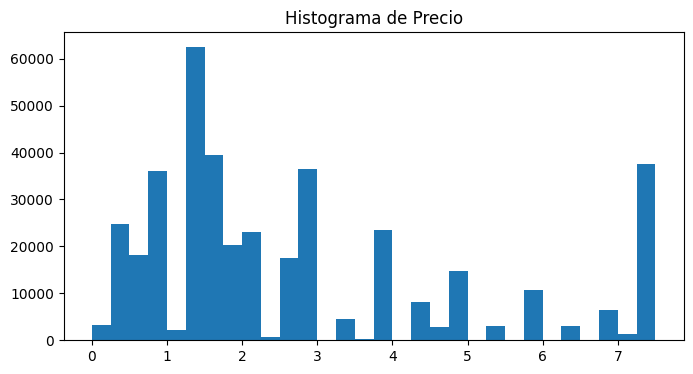

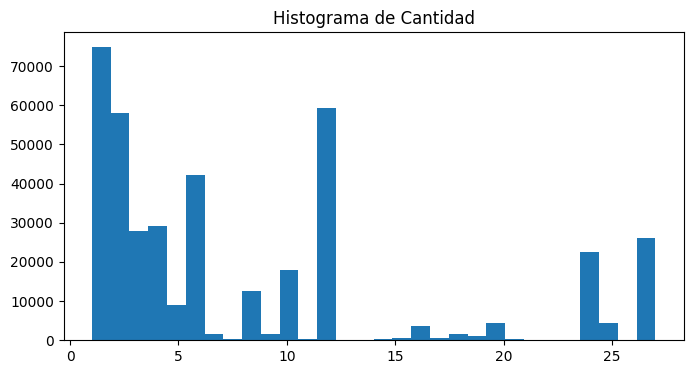

conteo de nulos:
Quantity       0
Price          0
Invoice        0
StockCode      0
Description    0
InvoiceDate    0
Customer ID    0
Country        0
dtype: int64


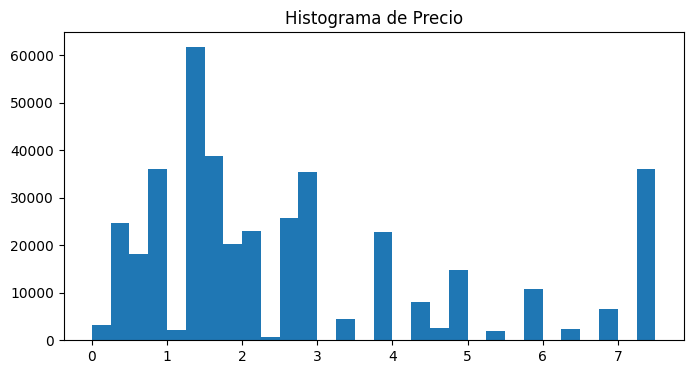

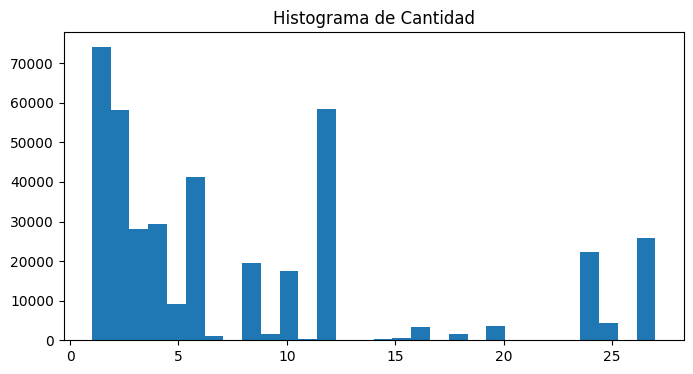

conteo de nulos:
Quantity       0
Price          0
Invoice        0
StockCode      0
Description    0
InvoiceDate    0
Customer ID    0
Country        0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

# --- PUNTO 1: pipeline para imputar los datos faltantes por la categoría más frecuente  ---
categoric_transformations = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent'))
])

# --- PUNTO 2: agregar mean_imputer al pipeline numérico ---
numeric_transformations_mean = Pipeline([
    ('iqr', IQR(lambda_=1.5)),
    ('mean_imputer', SimpleImputer(strategy='mean'))
])

# --- PUNTO 3: ColumnTransformer con ambos pipelines -> df_mean_imputer ---
ct_mean = ColumnTransformer(
    transformers=[
        ('numerical',  numeric_transformations_mean, numerical_columns),
        ('categorical', categoric_transformations,   categorical_columns),
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')

df_mean_imputer = ct_mean.fit_transform(df_retail)

# --- PUNTO 4: comparar explore_data entre df_mean_imputer y df_iqr ---
print("\n[COMPARE] df_mean_imputer vs df_iqr")
explore_data(df_mean_imputer)
explore_data(df_iqr)

# --- PUNTO 5: cambiar a KNNImputer (con menos vecinos si es pesado) -> df_knn_imputer ---
numeric_transformations_knn = Pipeline([
    ('iqr', IQR(lambda_=1.5)),
    ('knn_imputer', KNNImputer(n_neighbors=3))  # usa 3 para bajar tiempos si el dataset es grande
])

ct_knn = ColumnTransformer(
    transformers=[
        ('numerical',  numeric_transformations_knn, numerical_columns),
        ('categorical', categoric_transformations,  categorical_columns),
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')

df_knn_imputer = ct_knn.fit_transform(df_retail)

# --- PUNTO 6: comparar explore_data entre df_knn_imputer y df_iqr ---
print("\n[COMPARE] df_knn_imputer vs df_iqr")
explore_data(df_knn_imputer)
explore_data(df_iqr)

# --- PUNTO 7: comparar df_knn_imputer vs df_mean_imputer y dejar el método escogido ---
print("\n[COMPARE] df_knn_imputer vs df_mean_imputer")
explore_data(df_knn_imputer)
explore_data(df_mean_imputer)

# (opción tomada) Me quedo con KNNImputer por preservar mejor la estructura local.
# Dejo ese método en el ColumnTransformer "final":
column_transformer = ct_knn  # <- éste es el que queda para el resto del trabajo
df_imputed = column_transformer.fit_transform(df_retail)  # por si necesitas la salida final


**Punto 4: ¿Qué diferencias observa en la distribución de los datos?**

Los gráficos muestran que la forma de los histogramas de Price y Quantity es prácticamente idéntica antes y después de imputar con la media. Eso confirma que al haber pocos nulos, reemplazarlos por el promedio no altera la distribución, solo refuerza un poco la zona central.

**Punto 6: ¿Qué diferencias observa en la distribución de los datos?**

La diferencia con IQR también es mínima, pero el KNN reparte los imputados dentro de los rangos donde ya había datos. Eso respalda la idea de que este método preserva mejor la varianza local y evita la acumulación artificial que genera la media.

**Punto 7: ¿Cuál método de imputación es mejor? (justificar)**

Al contrastar ambos, los histogramas son muy similares, pero se aprecia que la media concentra imputaciones en torno al valor promedio, mientras que KNN las distribuye de forma más natural en los intervalos con observaciones reales. Por eso se concluye que KNN es más preservador de la estructura original.

### 4. Creación de nuevas features [2.0 puntos]

<p align="center">
  <img width=250 src="https://miro.medium.com/max/1000/1*JtTWgAcfVTWV8OTjT47Atg.jpeg">
</p>


#### 4.1 Definicion de LRMFP [1.0 puntos]

Dado que Mr. Lepin está interesado en obtener nuevos atributos relevantes para su negocio, su equipo de expertos sugiere la construcción de variables **LRMFP**, las que se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales. **Considere "hoy" como la fecha mas reciente del dataset**.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente.

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.


$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [10]:
def LRMFP(dataframe_in):
    """
    Devuelve un DataFrame con columnas:
    [Customer ID, Length, Recency, Frequency, Monetary, Periodicity]
    """
    try:
        df = dataframe_in[['Customer ID', 'InvoiceDate', 'Invoice', 'Quantity', 'Price']].copy()
    except:
        raise ValueError("Ingrese un DataFrame con las columnas 'Customer ID', 'InvoiceDate', 'Invoice', 'Quantity', 'Price'")

    # Fechas limpias
    df = df.dropna(subset=['InvoiceDate'])      # limpiar Nan
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)       # solo fecha, sin hora

    # "hoy" = fecha más reciente del dataset
    today = df['InvoiceDate'].max()

    # Cálculo de gasto total
    df["TotalPrice"] = df['Quantity'].astype(float) * df['Price'].astype(float)

    # Agrupación para cálculos por cliente
    clients = df.groupby(by='Customer ID', observed = True)

    # métricas L, R, M, F, P por cliente
    L = (clients['InvoiceDate'].max()-clients['InvoiceDate'].min()).dt.days.astype('int')
    R = (today - clients['InvoiceDate'].max()).dt.days
    M = clients['TotalPrice'].mean().round(2)
    F = clients.size()
    P = clients['InvoiceDate'].apply(lambda s: s.sort_values().diff().dt.days.std(ddof=0)).fillna(0.0).round(1)

    out = pd.concat([L, R, F, M, P], axis=1)
    out.columns = ["Length", "Recency", "Frequency", "Monetary", "Periodicity"]
    out.sort_index(inplace=True)
    out.reset_index(inplace=True)

    return out

# ========================
# EJECUCIÓN Y VISUALIZACIÓN
# ========================
df_lrmfp = LRMFP(df_retail)

print("Tabla LRMFP:")
display(df_lrmfp.head(10))


Tabla LRMFP:


,Customer ID,Length,Recency,Frequency,Monetary,Periodicity
0,12346.0,196,164,32,11.42,21.8
1,12347.0,37,2,69,18.60,4.5
2,12348.0,0,73,20,11.11,0.0
3,12349.0,182,42,101,26.53,16.3
4,12351.0,0,10,21,14.33,0.0
5,12352.0,17,10,17,18.46,4.1
6,12353.0,0,43,20,16.20,0.0
7,12355.0,0,202,21,23.17,0.0
8,12356.0,44,15,79,45.60,3.8
9,12357.0,0,23,163,75.00,0.0


#### 4.2 Agregando las custom features [1.0 puntos]

Ahora, usted decide agregar al pipeline las nuevas variables creadas, para lo cual realiza las siguientes tareas:

1. Cree un nuevo pipeline llamado `retail_pipeline` que encapsule el ColumnTransformer y calcule las LRMFP. El primer paso del pipeline llámelo  `col_tranformer` y el segundo paso llámelo `custom_features`, incorpora las nuevas variables al dataframe. Hint: les puede ser útil investigar [este](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) método. [0.1 puntos]
2. Aplicar el pipeline actualizado a los datos proporcionados por Mr. Cheems, creando un nuevo dataframe llamado `df_custom`. [0.1 puntos]
3. Explorar la distribución de las nuevas variables con `explore_data` y comentar brevemente (2-3 líneas) características de cada custom feature. [0.5 puntos]
5. Entregar un insight para el negocio en base a las nuevas variables. [0.3 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta**

In [17]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# --- Transformador liviano para agregar LRMFP calculado sobre X ---
class AddLRMFP(BaseEstimator, TransformerMixin):
    def __init__(self, key_col="Customer ID"):
        self.key_col = key_col

    def set_output(self, transform='default'):
        return self

    def fit(self, X, y=None):
        # Asegurar DataFrame (por si viene como ndarray)
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        # Calcula LRMFP con tu función definida antes
        self.lrmfp_ = LRMFP(X_df)
        return self

    def transform(self, X):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        # Une por llave; si no está, concatena por índice
        if self.key_col in X_df.columns and self.key_col in self.lrmfp_.columns:
            return X_df.merge(self.lrmfp_, on=self.key_col, how="left")
        return pd.concat([X_df.reset_index(drop=True),
                          self.lrmfp_.reset_index(drop=True)], axis=1)

# Asegura salida pandas y nombres sin prefijos en tu ColumnTransformer ya creado
column_transformer.set_output(transform='pandas')
column_transformer.set_params(verbose_feature_names_out=False)

# --- retail_pipeline: ColumnTransformer -> AddLRMFP ---
retail_pipeline = Pipeline([
    ('col_transformer', column_transformer),
    ('custom_features', AddLRMFP(key_col="Customer ID")),
]).set_output(transform='pandas')

# --- Ejecutar ---
df_custom = retail_pipeline.fit_transform(df_retail)

# Formateo opcional
for c, nd in [("Monetary", 2), ("Periodicity", 1)]:
    if c in df_custom.columns:
        df_custom[c] = df_custom[c].round(nd)

display(df_custom.head(10))

,Quantity,Price,Invoice,StockCode,Description,InvoiceDate,Customer ID,Country,Length,Recency,Frequency,Monetary,Periodicity
0,12.0,6.95,ID489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
1,12.0,6.75,ID489434,79323P,PINK CHERRY LIGHTS,2010-03-07 15:34:00,13085.0,United Kingdom,96,277,62,32.09,8.6
2,12.0,6.75,ID489434,79323W,WHITE CHERRY LIGHTS,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
3,27.0,2.10,ID489434,22041,"RECORD FRAME 7"" SINGLE SIZE",2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
4,24.0,1.25,ID489434,21232,STRAWBERRY CERAMIC TRINKET BOX,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
5,24.0,1.65,ID489434,22064,PINK DOUGHNUT TRINKET POT,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
6,24.0,1.25,ID489434,21871,SAVE THE PLANET MUG,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
7,10.0,5.95,ID489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,2009-12-01 07:45:00,13085.0,United Kingdom,96,277,62,32.09,8.6
8,12.0,2.55,ID489435,22350,CAT BOWL,2009-12-01 07:46:00,13085.0,United Kingdom,96,277,62,32.09,8.6
9,12.0,3.75,ID489435,22349,"DOG BOWL , CHASING BALL DESIGN",2009-12-01 07:46:00,13085.0,United Kingdom,96,277,62,32.09,8.6


In [ ]:
# Escoger columnas a graficar
def explore_data(dataframe_in, bins=30, cols=None):
    import matplotlib.pyplot as plt
    df = dataframe_in
    if cols is None:  # comportamiento original
        cols = ['Price', 'Quantity']
    for c in cols:
        if c not in df.columns: 
            continue
        plt.figure(figsize=(8,4))
        plt.hist(df[c].dropna(), bins=bins, edgecolor="black")
        plt.title(f'Histograma de {c}')
        plt.xlabel(c); plt.ylabel('Frecuencia'); plt.grid(alpha=0.3)
        plt.show()
    print("Conteo de nulos por variable:\n", df[cols].isna().sum())

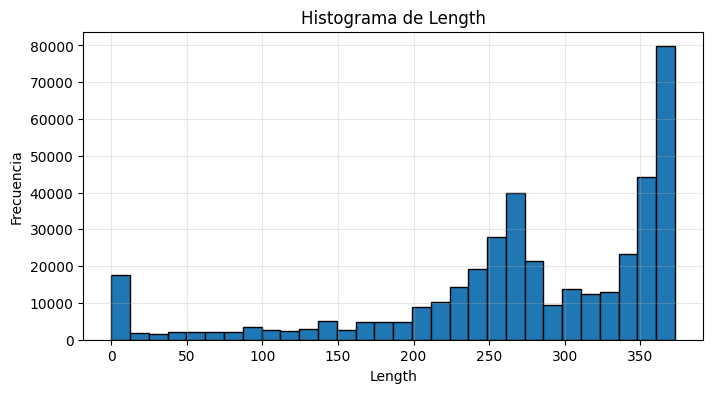

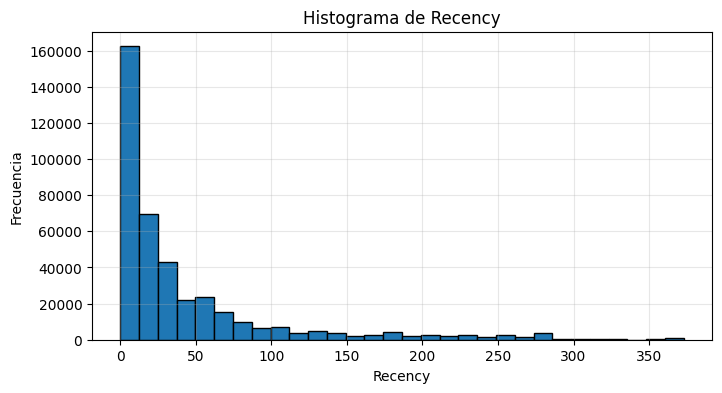

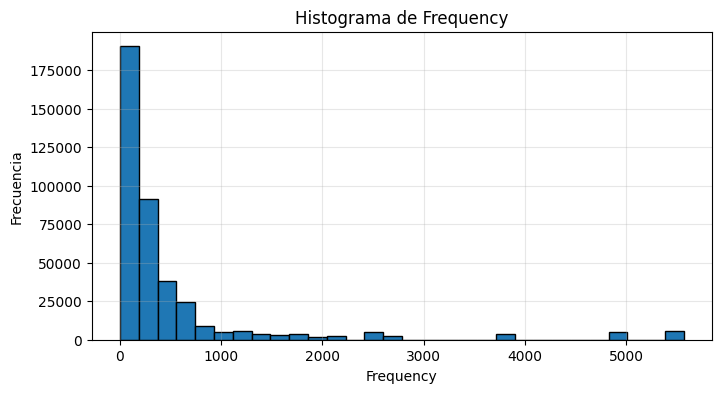

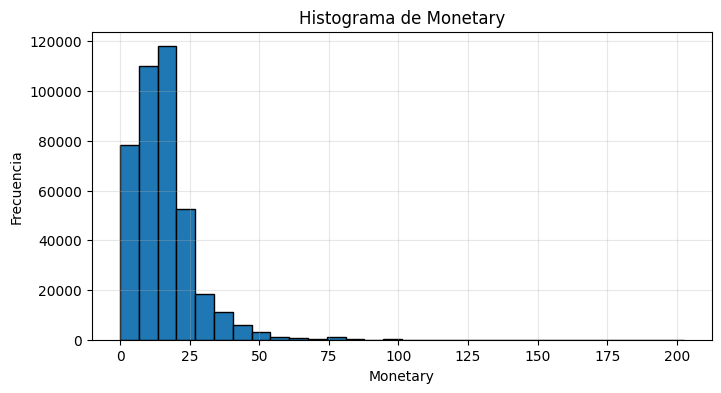

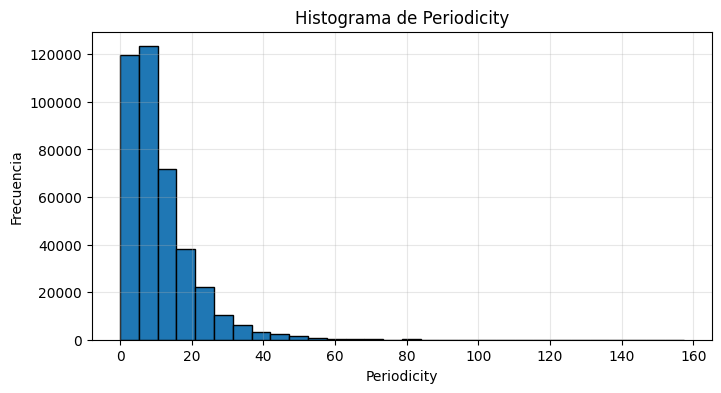

Conteo de nulos por variable:
 Length         0
Recency        0
Frequency      0
Monetary       0
Periodicity    0
dtype: int64


In [19]:
lrmfp_cols = ["Length","Recency","Frequency","Monetary","Periodicity"]
explore_data(df_custom, cols=lrmfp_cols)

Respuesta 4.2.3:

La distribución de Length se concentra en valores altos y en clientes con casi un año de historial. Recency es asimétrica, ya que la mayoría compró hace poco, pero existe un grupo que no compra hace mucho y está en riesgo de abandono. Frequency y Monetary presentan distribuciones con colas largas, o sea la mayoría compra poco y gasta poco, mientras un grupo reducido concentra gran parte de las visitas y de los ingresos. Periodicity indica que muchos clientes son regulares, pero otros compran de forma errática.

Respuesta 4.2.4:

A partir del analisis de estas nuevas variables se puede distinguir el nivel de fidelidad y riesgo de los clientes. Aquellos con alta Recency y baja Frequency/Monetary son los más propensos a abandonar, por lo que conviene enfocarlos con campañas de reactivación. En contraste, los clientes de baja Recency y alta Frequency/Monetary representan el núcleo más valioso, y deberían priorizarse en programas de fidelización e incentivos. Periodicity ayuda a segmentar entre clientes consistentes y erráticos, aportando información clave para diseñar estrategias diferenciadas.

### 5. MinMax Scaler [1.0 puntos]

<p align="center">
  <img width=300 src="https://i.imgflip.com/1fsprn.jpg">
</p>


#### 5.1 Definición del Column Transformer [0.5 puntos]

Construya una clase llamada `MinMax()` para realizar una transformación de cada una de las columnas de un DataFrame utilizando `ColumnTransformer()`. Recuerde  usar `BaseEstimator` y `TransformerMixin`.


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$


Consulte el siguiente [link](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer) si tiene dudas sobre la creación de custom transformers.

**Respuesta:**

In [22]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class MinMax(BaseEstimator, TransformerMixin):
    """
    Escala cada columna a [0,1] preservando nombres e índice.
    Si el input es ndarray, usa `columns` para reconstruir un DataFrame.
    """
    def __init__(self, columns=None):
        self.columns = columns  # lista opcional de nombres de columnas

    def fit(self, X, y=None):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X, columns=self.columns)
        self.columns_ = list(X_df.columns)
        self.min_values_ = X_df.min(axis=0)
        self.max_values_ = X_df.max(axis=0)
        return self

    def transform(self, X):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X, columns=getattr(self, "columns_", self.columns))
        denom = (self.max_values_ - self.min_values_)
        # evitar división por cero: si denom=0 => 0
        scaled = (X_df - self.min_values_) / denom.replace(0, np.nan)
        scaled = scaled.fillna(0.0)
        # devolver DataFrame con mismo índice/columnas
        return pd.DataFrame(scaled.values, index=X_df.index, columns=self.columns_)

    def get_feature_names_out(self, input_features=None):
        # para que ColumnTransformer con set_output('pandas') mantenga los nombres
        return np.asarray(self.columns_ if input_features is None else input_features)

    def set_output(self, transform='default'):
        return self

#### 5.2 Incorporando MinMax al pipeline [0.5 puntos]

Ahora, usted decide agregar el escalamiento al pipeline, para lo que decide seguir los siguientes pasos:

- Agregar el paso `minmax` al pipeline `numeric_transformations`, haciendo uso de la clase creada. [0.1 puntos]
- Defina el dataframe `df_minmax` aplicando el ColumnTransformer actualizado a los datos proporcionados por Mr. Cheems. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_minmax`. [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables.  [0.2 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta:**


[COMPARE] df_retail vs df_minmax (Price/Quantity)


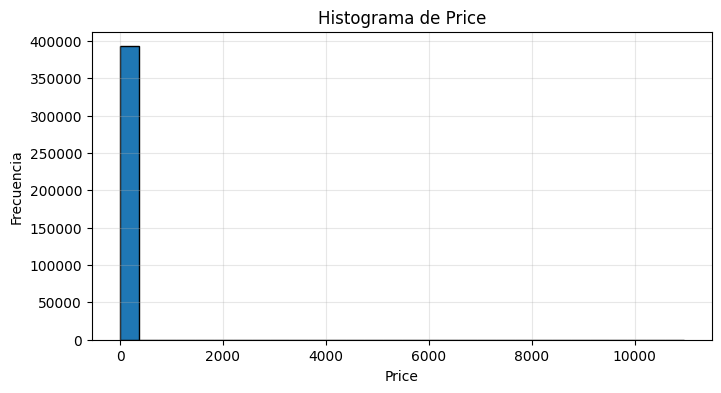

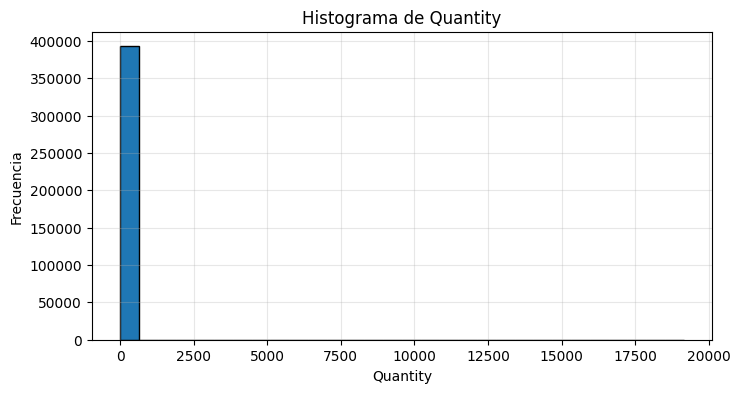

Conteo de nulos por variable:
 Price       8356
Quantity    7915
dtype: int64


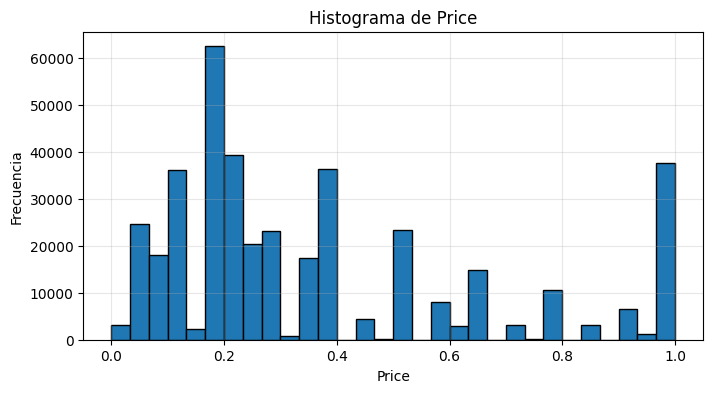

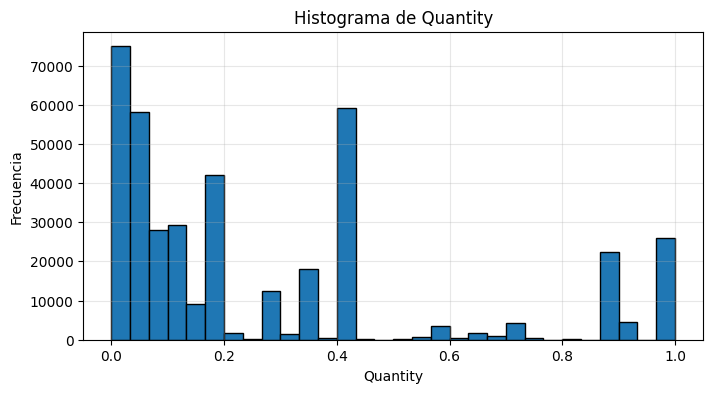

Conteo de nulos por variable:
 Price       0
Quantity    0
dtype: int64
     Quantity  Price
min       0.0    0.0
max       1.0    1.0


In [23]:
# 1) Paso MinMax dentro del pipeline numérico (al final del pipeline)
numeric_transformations_minmax = Pipeline([
    ('iqr', IQR(lambda_=1.5)),                 # tu paso existente
    ('imputer', KNNImputer(n_neighbors=3)),    # o SimpleImputer(mean) si estabas usando media
    ('minmax', MinMax())                       # <-- NUEVO paso
])

# 2) ColumnTransformer actualizado
ct_minmax = ColumnTransformer(
    transformers=[
        ('numerical',  numeric_transformations_minmax, numerical_columns),
        ('categorical','passthrough',                  categorical_columns),
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')

# 3) Aplicar a los datos
df_minmax = ct_minmax.fit_transform(df_retail)

# 4) Visualizar (se verán en [0,1])
print("\n[COMPARE] df_retail vs df_minmax (Price/Quantity)")
explore_data(df_retail)     # original
explore_data(df_minmax)     # escalado

# (opcional) comprobar que quedaron en [0,1]
print(df_minmax[numerical_columns].describe().loc[['min','max']])

Ejemplo: Tras aplicar el escalamiento MinMax, las distribuciones de Price y Quantity pierden la forma de los datos originales, porque ahora sus valores están acotados en el rango [0,1]. Esto se refleja porque la escala de los ejes cambia, antes los valores alcanzaban miles de unidades, mientras que ahora se normalizan entre 0 y 1. Además, el escalamiento elimina los valores nulos y facilita la comparación entre variables, algo especialmente útil para algoritmos sensibles a la magnitud de las features.

### 6. Pregunta teórica [0.5 puntos]

<p align="center">
  <img width=300 src="https://file.coinexstatic.com/2023-09-19/166BAC031F222E5910954E7D7D0BC844.png">
</p>

Finalmente, explíquele a Mr. Cheems porqué es útil la creación de pipelines al momento de hacer Feature Engineering en Machine Learning.

**Respuesta:**

Los pipelines son de gran utilidad para evitar el data leackage, es decir, evitar introducir información de los datos de test en los datos de entrenamiento. Esto es especialmente útil cuando se quiere realizar muchos pasos de *Feature Engineering*, donde es fácil confundirse y, por ejemplo, hacer fit con todo el dataset en lugar de solo los datos de entrenamiento.

Además, facilitan la aplicación secuencial de múltiples transformaciones, asegurando que todas las transformaciones se apliquen de manera limpia y completa, tanto en el conjunto de entrenamiento como en los de test y validación.